# 1.Ramme inn problemet og se på det store bildet

Vanligvis kan folk få verdien av huset sitt ved å kontakte et boligbyrå eller ved å se på prisene i dette område. 
I denne notatboken vil vi bruke historiske data for å kunne forutsi boligpriser i California. 
De historiske dataene stammer fra et datasett fra 1997 som inneholder boligpriser i California.

# 2. Få dataene

Datasettet er en del av øvelse i boken "Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow concepts, tools, and techniques to build intelligent systems", 2019. Datasettet blir lastet ned som en .tgz fil via github som inneholder datasettet i en .csv fil.

In [1]:
# Importer og lagre lokalt

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [2]:
# Lese data og lagre dei
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing_test = pd.read_csv('datasets\housing\housing_test_data.csv')
housing = pd.read_csv('datasets\housing\housing_data.csv')

In [4]:
# Lagre data i rammen og sjekk om de er lastet inn riktig
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Utforske dataene for å få innsikt

   Starter med å få en oversikt av datasettet

In [5]:
housing.info()
housing.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [7]:
#Vi kan merke oss at total_bedrooms har noen nullverdier. Hvert felt utenom ocean_proximity er en float. Vi må utforske 
#ocean_proximity-verdiene slik at de kan bli tranformert senere. Vi kan også kjøre en nullsjekk på hele datasettet for 
#å sikre at total_bedrooms er den eneste kolonnen som har nullverdier

In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
#Nå vet vi at ocean_proximity har strengkategorier som vi må transformere senere. 
#Vi kan merke oss de 5 forekomstene av "ISLAND" som kan forårsake noe støy. 
#Det var også forventet funn av 207 nullverdier i total_bedrooms.

#Då kan vi plotte inn alle funksjonene for å få en del av spennvidden til dataene i settet

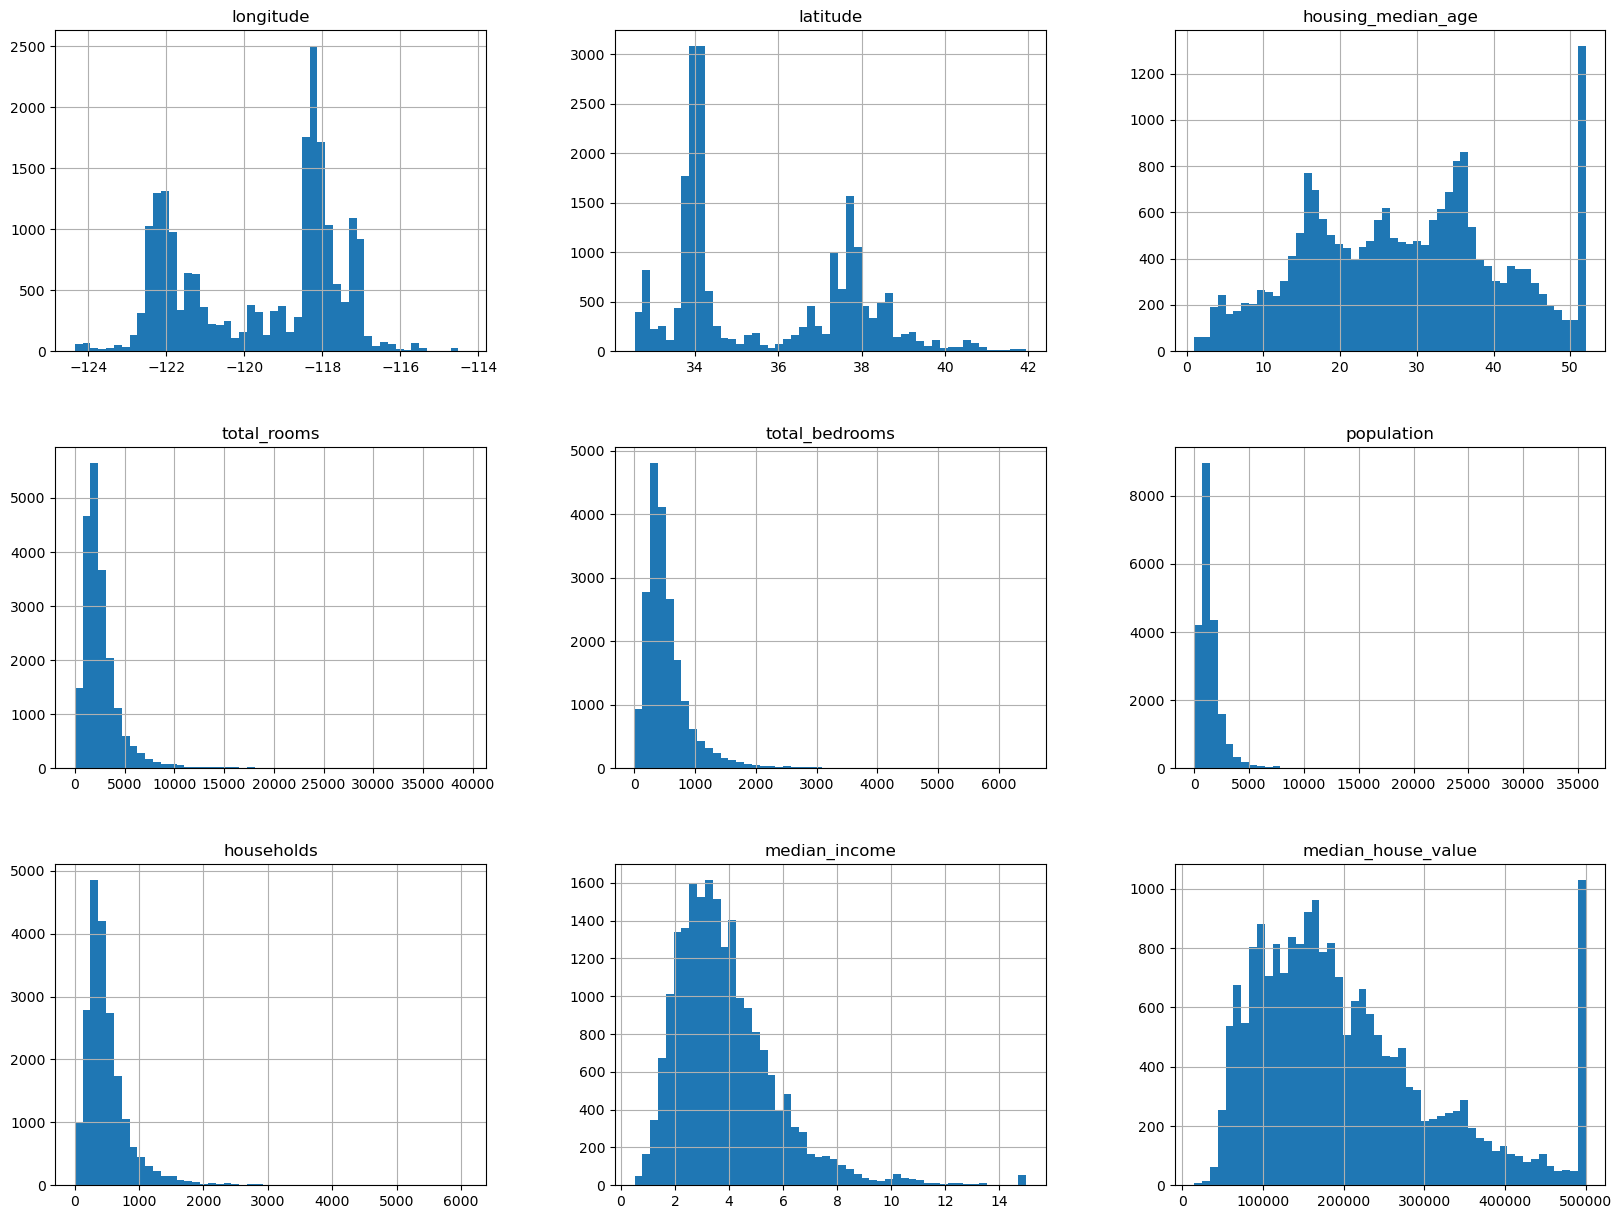

In [13]:
#Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


In [14]:
#Dette gir en indikasjon på at dataene allerede er litt modifisert.  Median_house_value ser ut til å være belagt med 500 001. 
#Samme med housing_median_age, som ser ut å være belagt ved 52. Median_income ser ut til å ha gått gjennom en form for 
#forbehandling allerede.

#Ettersom vi skal forutsi prisen, vil det være interessant å se hvordan median_income korrelerer med median_house_value

C:\Users\sigva\AppData\Local\Temp\ipykernel_20844\3354019091.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


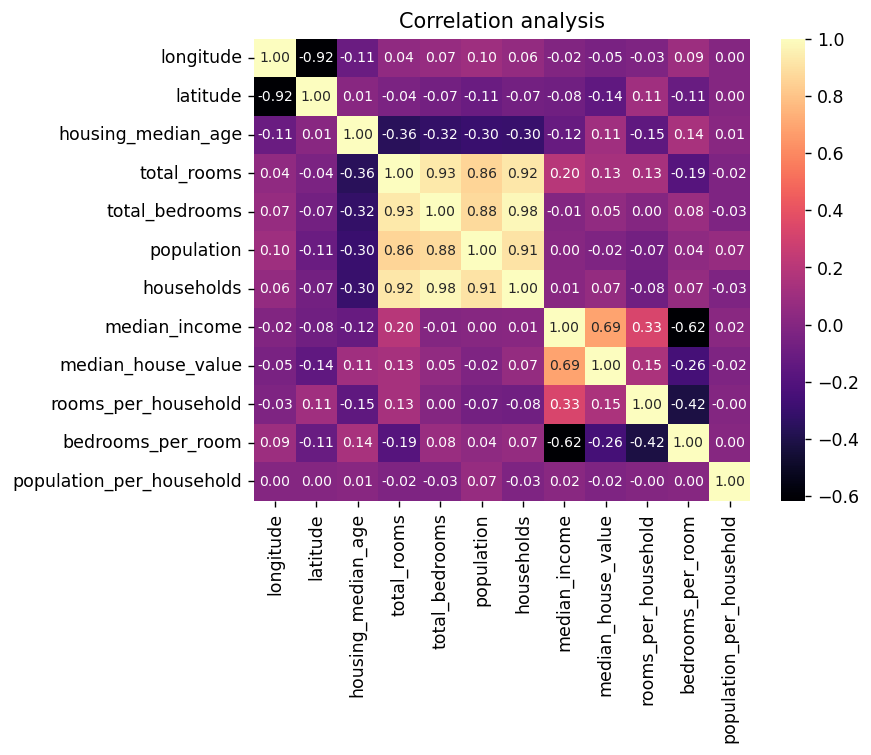

In [15]:
import seaborn as sns

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr = housing.corr()

plt.figure(dpi=125)
plt.title('Correlation analysis')
sns.heatmap(corr,
            annot=True,
            annot_kws={"size": 8},
            robust=True,
            linewidths = .5,
            lw=0,
            linecolor='white',
            cmap='magma',
            fmt = "0.2f")

plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [16]:
#Av dette varmekartet, kan vi vi kan se at det korrelerer rooms_per_household mer med median_house_value enn total_rooms. 
 #median_income har høyest korrelasjon med median_house_value

#Siden median_income er en viktig funksjon, kan vi kategorisere den med lavt, middels og høy inntekt. 
#Siden vi ikke kan bruke tekstetikett i datasettet, vil vi bare merke kategoriene med tall fra 1 til 5.

In [17]:
# Lage test og trene den

import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

In [19]:
housing["income_cat"].value_counts() / len(housing)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

<AxesSubplot:>

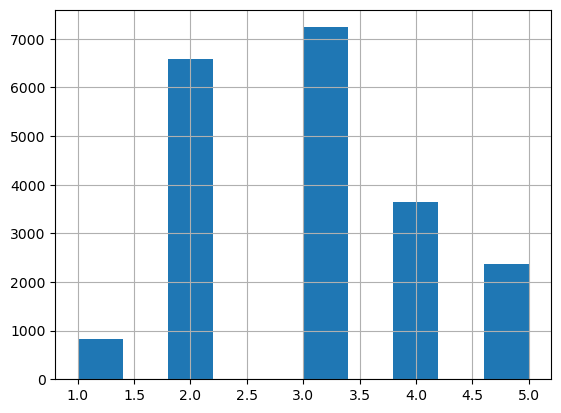

In [20]:
housing["income_cat"].hist()

# 4. Forberede dataene

In [21]:
# Visualisere trening sette  og lage en kopi av det

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

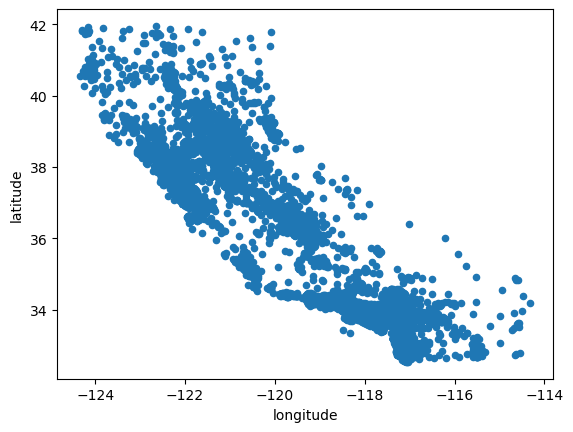

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

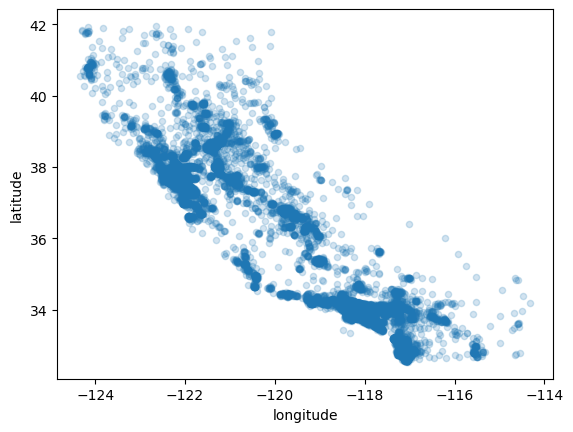

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

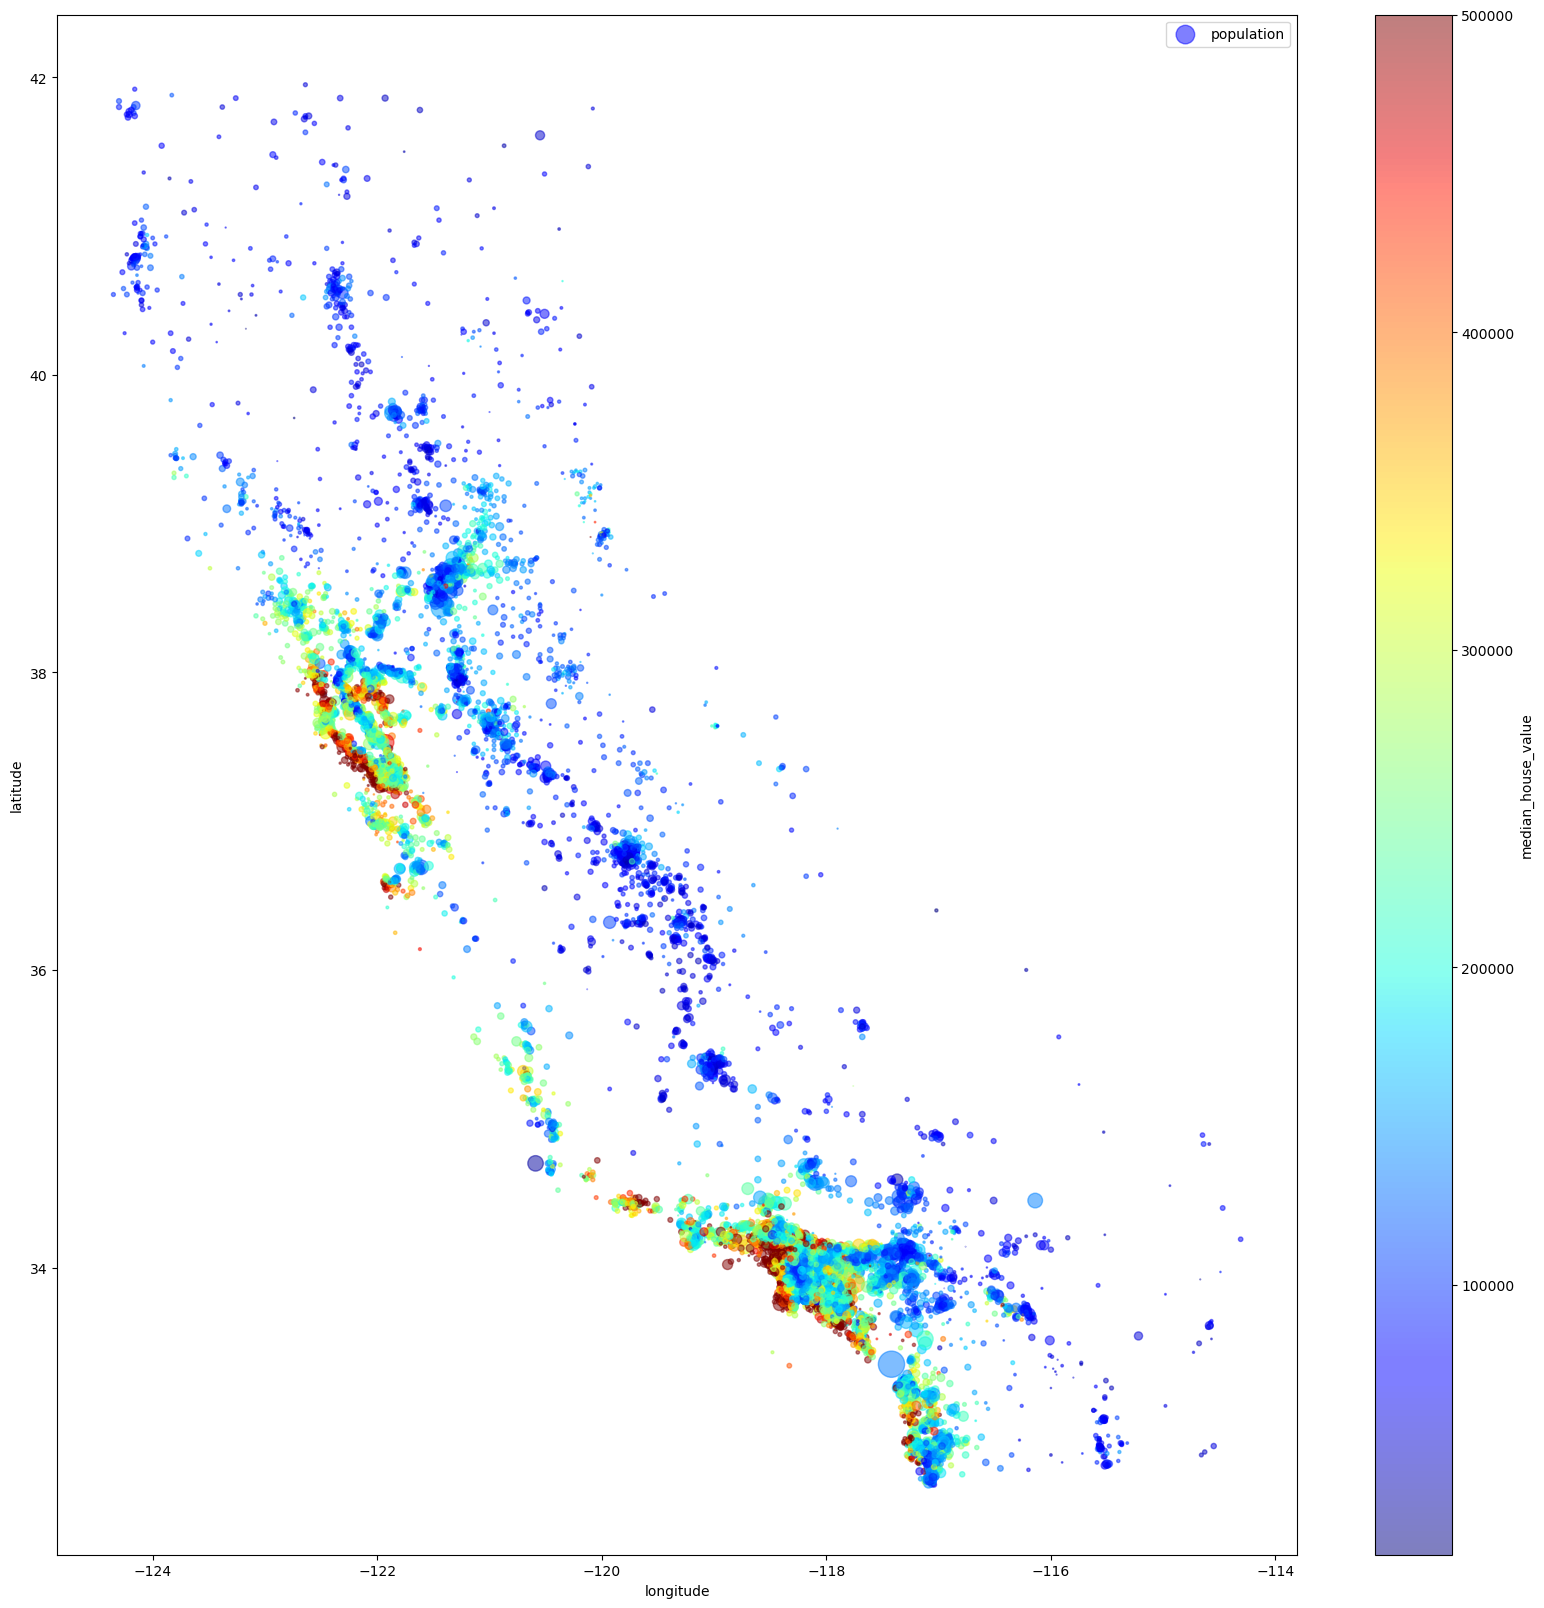

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
         s=housing["population"]/100, label="population",
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(20,20)
     )
plt.legend()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

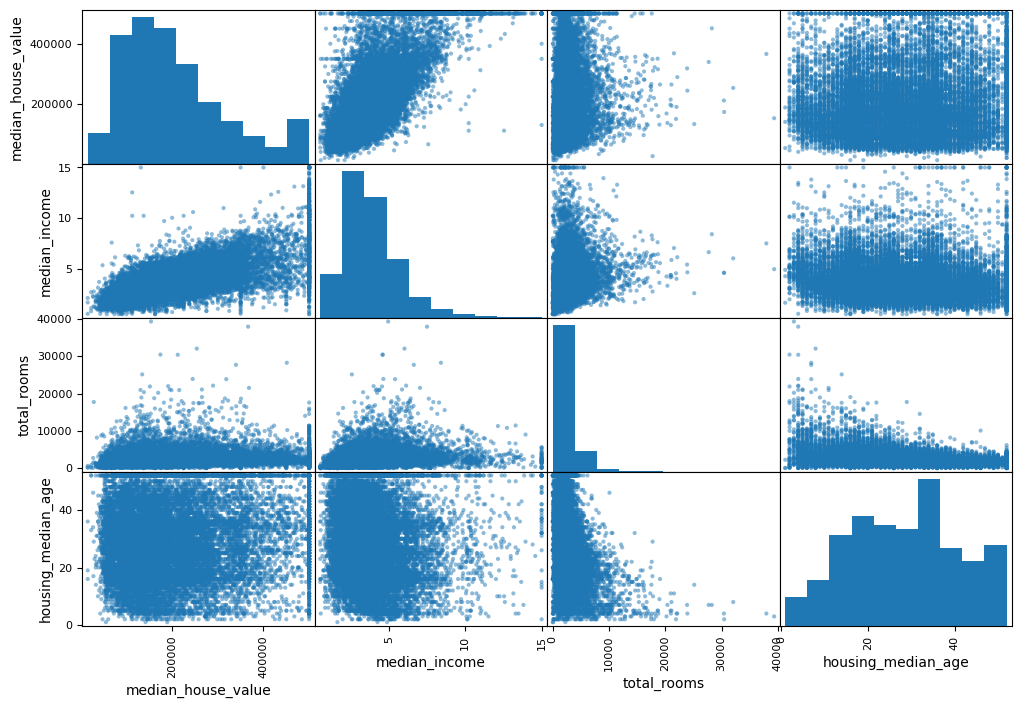

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
    "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

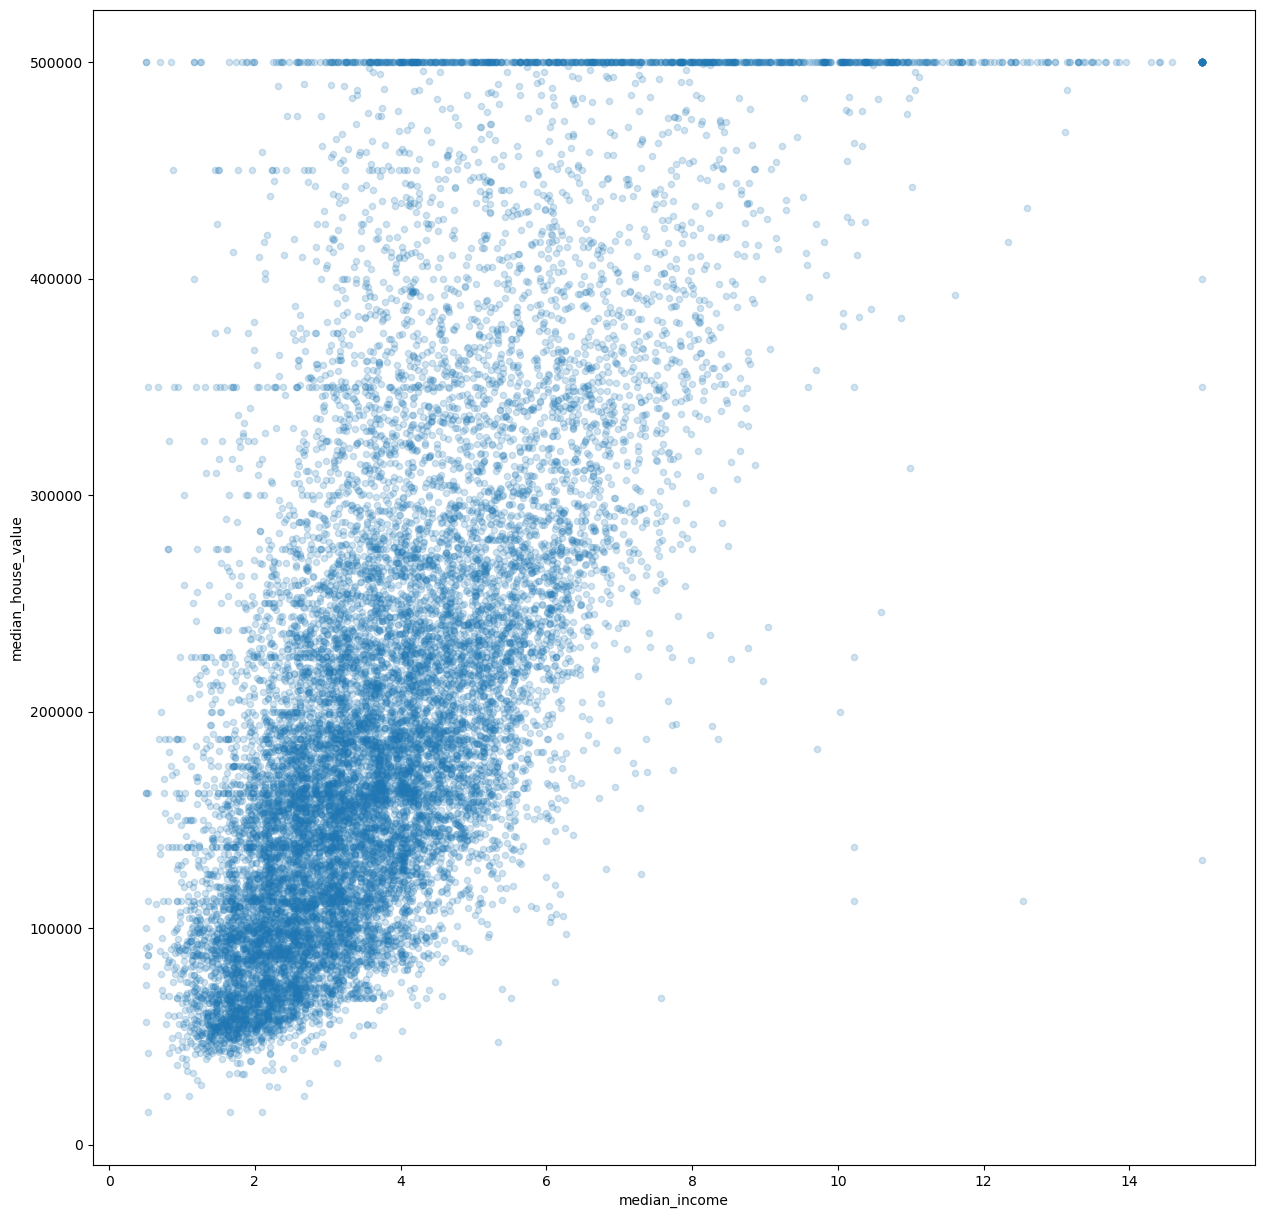

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
    alpha=0.2, figsize=(15,15))

In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [29]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\sigva\AppData\Local\Temp\ipykernel_20844\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
income_cat                  0.642256
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [30]:

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,0.205784,3.168555,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,0.160714,2.623698,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,5.393333,0.191595,2.223333,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,0.276505,1.859213,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,0.182692,3.167241,3.0


In [32]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,4.707668,NaN,1.317891,2.0
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,4.537074,NaN,3.947896,3.0
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,5.826196,NaN,2.403023,3.0
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,4.448980,NaN,2.840136,3.0
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,6.835417,NaN,2.385417,5.0


In [33]:
# Vaske dataene
# Manglende verdier i datasettet. Beregner median antallet av soverom og bruk det til å fylle cellene som verdier

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY,4.707668,NaN,1.317891,2.0
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN,4.537074,NaN,3.947896,3.0
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN,5.826196,NaN,2.403023,3.0
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN,4.448980,NaN,2.840136,3.0
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN,6.835417,NaN,2.385417,5.0


In [34]:
# Handtering av tekst og kategoriattributter 
# Konvertere ocean_proximity

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00,  3.00000000e+00])

In [36]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00,  3.00000000e+00])

In [37]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [39]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [40]:
# omforme matrisen til 2D
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [41]:
#Tilpassede transformering

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [42]:
# funksjonskalering

# ML-algoritmer fungerer generelt ikke godt når dataene fra forskjellige attributtene er på vidt forskjellige skalaer. 
# Derfor må det brukes noen teknikker for å få de på omtrent samme skala.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [44]:
from sklearn.base import TransformerMixin #gives fit_transform method

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [45]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])

In [46]:
#kjøring av pipeline
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [47]:
housing_prepared.shape

(16512, 20)

# 5 . Utforske mange forskjellige modeller og liste de beste

In [48]:
# Velg en og tren den

In [49]:
#Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [50]:
# Gjort. Du har nå en Linear Regression moddel. La oss prøve noen instnser fra settet

In [51]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [ 81485.5 316416.  142101.5 185338.  234527.5]


In [52]:
print("Labels:\t\t", list(some_labels))

Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [53]:
# Det virker, men ikke veldig godt. Vi vil bruke regression models RMSE i hele treningssettet  
# ved bruk av mean_squared_error function

In [54]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67784.88016325128

In [55]:
# Dette vil si at vi har en prediksjonsfeil på pmtrent $67700. Det er ikkje bra når vi har en husverdi på
# mellom $120 000 - $265 000. Et eksempel på at modellen er underfitting. 
# For å fikse dettee kan det brukes en kraftig modell eller gi algoritmen bedre funksjoner
#  Vi prøver DecisionTreeRegressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [57]:
# Evaluering

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [58]:
# Ikke noen errors. Ikke riktig, så det må evalueres bedre for å finne ut om det er overfitting eller ikke
# Prøver cross-Validation

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [60]:
# Dette treningssettet deler treningssettet tilfeldig i 10 forskjellige delsett kalt folder. 
# Deretter trener vi og evaluerer
# tremodell 10 ganger og velge en annen fold hver gang for evaluering og trener de andre 9 foldene. Resultatet blir i en
# matrise som inneholder de 10 poengsummene.


In [61]:
# Resultatet

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [73528.81928231 71273.01569247 67364.82699789 72445.64452125
 70035.23559171 76493.13930705 69370.54924307 73716.74165207
 70675.87170648 70694.06210909]
Mean: 71559.79061033922
Standard deviation: 2449.0810934119518


In [62]:
# Decision Tree ser ikke så bra ut som det gjorde tidligere. Den ser ut til å fungere
# verre enn Linear Regression model. 
# cross-validation tillater det du får ikke bare et estimat av ytelsen til modellen din, 
# men også et mål av hvor nøyaktig anslaget er.
# The Decision Tree poengsum på omtrent 71000, generelt ± 2 000.

# Cross validation kommer på bekostning av å trene modellen flere ganger, så ikke alltid mulig.
# Du ville ikke ha denne informasjonen hvis du bare brukte ett valideringssett.


In [63]:
# Now we can use line reggression model to get the same scores.

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
        scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70887.19255832 63728.50678666 67366.30635533 68081.26178539
 66066.34024317 71798.73143182 69465.71781209 68145.99002718
 65400.17181054 69733.34187153]
Mean: 68067.35606820277
Standard deviation: 2388.450561589649


In [64]:
# Prøver en siste modell. RandomForestRegressor. 
# Denne trener mange beslutningstrær på tilfeldige delsett av funksjoner. Deretter beregner gjennomsnittet
# Å bygge en modell på toppen av mange andre modeller kalles Ensemble Learning

In [65]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [66]:
display_scores(forest_rmse_scores)

Scores: [51336.93310468 48906.68916022 46568.49267468 51717.72846994
 46966.81055205 52217.24606515 52165.54906841 49628.03072142
 48579.34470887 53652.96925723]
Mean: 50173.979378263655
Standard deviation: 2274.042484239959


In [67]:
#Dette er bedre. Bedre score

# 6 Finjuster modellene og kombiner dem til en bra løsning

In [68]:
# Grid search

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [69]:
# Grid search vil utforske 12 + 6 = 18 kombinasjoner av RandomForestRegressor hyperparameterverdier.
# Den vil trene hver modell fem ganger (femdobbel kryssvalidering).
# Tilsammen vil det bli 18 x 5 = 90 treningsrunder
# Det kan ta tid, men når det er gjort kan du få den beste kombinasjonen av parametererne


In [70]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [71]:
# Eller den beste estimatoren direkte

grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [72]:
# Evaluering

cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65451.18831122908 {'max_features': 2, 'n_estimators': 3}
57341.94470586724 {'max_features': 2, 'n_estimators': 10}
54631.801432654145 {'max_features': 2, 'n_estimators': 30}
62241.57179202217 {'max_features': 4, 'n_estimators': 3}
54603.55545405274 {'max_features': 4, 'n_estimators': 10}
52844.49870781059 {'max_features': 4, 'n_estimators': 30}
61363.28418533319 {'max_features': 6, 'n_estimators': 3}
54062.10504958247 {'max_features': 6, 'n_estimators': 10}
52116.97169613146 {'max_features': 6, 'n_estimators': 30}
60323.272360712246 {'max_features': 8, 'n_estimators': 3}
53562.046944851674 {'max_features': 8, 'n_estimators': 10}
51608.82405642721 {'max_features': 8, 'n_estimators': 30}
63606.423758060606 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56120.82649809981 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62157.90722270559 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54555.15467470943 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [73]:
# Den beste scoren 51608 og bruker 30 estimater.

In [74]:
# Det neste er søk i tilfeldig størrelse. Grid search er greit hvis du utforsker få kombinasjoner. 
# hvis hyperparameter er , vil RandomizedSearchCV, foretrekt å bli brukt i stedet.
# RandomizedSearchCV er å evaluere et gitt antall tilfeldige kombinasjoner ved å velge en tilfeldig verdi for
# hver hyperparameter og ved hver iterasjon.

# Noen fordeler:
# - Hvis du lar det randomiserte søket kjøre for for eksempel 1000 iterasjoner, vil denne tilnærmingen utforske,
# 1000 forskjellige verdier for hver hyperparameter (i stedet for bare noen få verdier per hyperparameter med grid search-tilnærmingen).
# Du har mer kontroll over databudsjettet du vil allokere til hyperparameter
# søk, ganske enkelt ved å angi antall iterasjoner.


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=50),
        'max_features': randint(low=1, high=9),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002860A02F730>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002860BCD57F0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [76]:
# Resultatet

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52026.240038959746 {'max_features': 7, 'n_estimators': 29}
51592.53413157991 {'max_features': 7, 'n_estimators': 43}
52342.740243276974 {'max_features': 8, 'n_estimators': 21}
52429.4506034366 {'max_features': 7, 'n_estimators': 19}
53753.90235905318 {'max_features': 7, 'n_estimators': 11}
53557.90683959318 {'max_features': 3, 'n_estimators': 24}
52244.04644649284 {'max_features': 5, 'n_estimators': 36}
52196.80575560916 {'max_features': 8, 'n_estimators': 24}
53723.03828807538 {'max_features': 3, 'n_estimators': 22}
65957.05901981404 {'max_features': 5, 'n_estimators': 2}


In [77]:
# Analysere de beste modellene og og feilene

In [78]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([5.29518628e-02, 5.16511677e-02, 4.08508700e-02, 1.39373690e-02,
       1.40240440e-02, 1.41490391e-02, 1.44172402e-02, 2.74561320e-01,
       3.08723824e-02, 3.41282006e-02, 6.66917733e-02, 1.33163115e-01,
       1.99652947e-02, 6.19955191e-02, 3.02639560e-02, 7.40162179e-03,
       1.33745058e-01, 6.21270387e-05, 2.16910070e-03, 2.99893836e-03])

In [79]:
# Vis viktighetsscore ved siden av tilsvarende attributtnavn

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2745613198145072, 'median_income'),
 (0.13374505844280943, 'INLAND'),
 (0.13316311478326281, 'income_cat'),
 (0.06669177328650322, 'population_per_household'),
 (0.06199551911650335, 'pop_per_hhold'),
 (0.052951862822936714, 'longitude'),
 (0.051651167739927346, 'latitude'),
 (0.04085087001366178, 'housing_median_age'),
 (0.034128200608703085, 'bedrooms_per_room'),
 (0.03087238238847554, 'rooms_per_household'),
 (0.03026395600890368, 'bedrooms_per_room'),
 (0.019965294724800627, 'rooms_per_hhold'),
 (0.014417240208240983, 'households'),
 (0.014149039103382626, 'population'),
 (0.014024044049089234, 'total_bedrooms'),
 (0.013937368997392863, 'total_rooms'),
 (0.007401621794744377, '<1H OCEAN'),
 (0.0029989383567229993, 'NEAR OCEAN'),
 (0.0021691007006926465, 'NEAR BAY'),
 (6.212703873947389e-05, 'ISLAND')]

In [80]:
# Lage en bedre pipeline

from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [81]:
k = 10

In [82]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  2,  7,  8,  9, 10, 11, 13, 16], dtype=int64)

In [83]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.2745613198145072, 'median_income'),
 (0.13374505844280943, 'INLAND'),
 (0.13316311478326281, 'income_cat'),
 (0.06669177328650322, 'population_per_household'),
 (0.06199551911650335, 'pop_per_hhold'),
 (0.052951862822936714, 'longitude'),
 (0.051651167739927346, 'latitude'),
 (0.04085087001366178, 'housing_median_age'),
 (0.034128200608703085, 'bedrooms_per_room'),
 (0.03087238238847554, 'rooms_per_household')]

In [84]:
# Lage en ny en

preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [85]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [86]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822,  0.02756357, -0.8936472 ,  0.01739526,
        -0.12248362,  0.00622264, -0.95468705,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.292168  ,  0.56925554,
        -0.91166333, -0.04081077,  1.89007821, -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.52543365, -0.01802432,
        -0.3709391 , -0.07537122, -0.95468705, -0.07537122,  1.        ]])

In [87]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822,  0.02756357, -0.8936472 ,  0.01739526,
        -0.12248362,  0.00622264, -0.95468705,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.292168  ,  0.56925554,
        -0.91166333, -0.04081077,  1.89007821, -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.52543365, -0.01802432,
        -0.3709391 , -0.07537122, -0.95468705, -0.07537122,  1.        ]])

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=29, high=30),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared_top_k_features, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002860B1F3640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002860B213E80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [89]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51076.149267348424 {'max_features': 7, 'n_estimators': 29}
51297.33338575915 {'max_features': 4, 'n_estimators': 29}
51005.24744367187 {'max_features': 8, 'n_estimators': 29}
51168.284777509885 {'max_features': 5, 'n_estimators': 29}
51076.149267348424 {'max_features': 7, 'n_estimators': 29}
51339.89680409711 {'max_features': 3, 'n_estimators': 29}
51076.149267348424 {'max_features': 7, 'n_estimators': 29}
51005.24744367187 {'max_features': 8, 'n_estimators': 29}
51168.284777509885 {'max_features': 5, 'n_estimators': 29}
51297.33338575915 {'max_features': 4, 'n_estimators': 29}
51005.24744367187 {'max_features': 8, 'n_estimators': 29}
51005.24744367187 {'max_features': 8, 'n_estimators': 29}
51339.89680409711 {'max_features': 3, 'n_estimators': 29}
51108.26014722122 {'max_features': 6, 'n_estimators': 29}
51168.284777509885 {'max_features': 5, 'n_estimators': 29}
51958.14699595054 {'max_features': 2, 'n_estimators': 29}
51005.24744367187 {'max_features': 8, 'n_estimators': 29}
51108.26

In [90]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=29, random_state=42)

In [91]:
# Evaluere systemet og test settet

final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
final_model.fit(housing_prepared_top_k_features, housing_labels)
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = preparation_and_feature_selection_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

criterion='squared_error'

C:\Users\sigva\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [94]:
# Prepare submission 

test_prepared = preparation_and_feature_selection_pipeline.transform(housing_test)
median_house_value = final_model.predict(test_prepared)
submission = pd.DataFrame({'Id': housing_test['Id'], 'median_house_value': median_house_value})
submission.head()

KeyError: "['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'income_cat'] not in index"

In [95]:
submission.to_csv('submission_2.csv', index=False)

NameError: name 'submission' is not defined

# Launch, monitor and maintain your system

In [96]:
# When launching our data model we need to change our input data with live production data from the housing market. 
# While transfering to production data we should also have unit tests in place to make sure things are behaving as expected.

# We need to monitor the performance of our model and cause events/triggers if the performance is low. 
# We also need to monitor the data input; if the input data isnt as expected it will cause problems with our model. 
# Further as the data evolves, we need to monitor if we need to update our model. 
# The model can become stale as the data input evolves.

# Even though we are going to monitor the input data and performance, 
# we should regardless retrain our models on a regular basis on fresh input data. 
# This will be an automatically scheduled job that runs every so often.